In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nx.__version__

'2.6.3'

In [ ]:
#Reading graph
G = nx.read_edgelist("/content/drive/MyDrive/GAM/PPT-Ohmnet_tissues-combined.edgelist",create_using=nx.DiGraph, nodetype=int, data=(("tissue", str),))

In [ ]:
#Graph information
print(nx.info(G))

DiGraph with 4510 nodes and 70338 edges


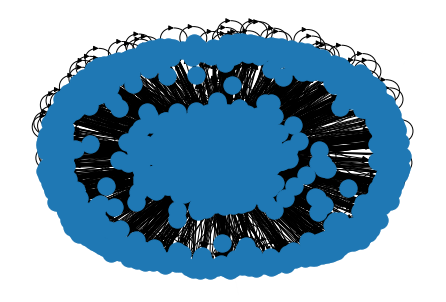

In [ ]:
#Visualize Graph
nx.draw(G)


In [ ]:
nx.is_directed(G)

True

In [ ]:
#get largest weakly conneccted components
largest = max(nx.weakly_connected_components(G),key=len)


In [ ]:
#get sub graph for these largest weakly connected components
Gsub = nx.subgraph(G,largest)

In [ ]:
nx.info(Gsub)

'DiGraph with 4488 nodes and 70316 edges'

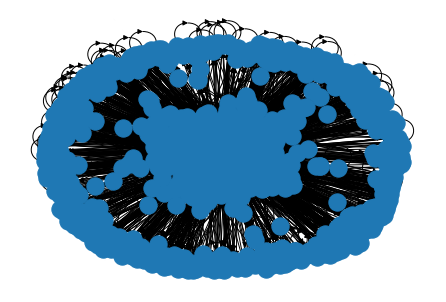

In [ ]:
nx.draw(Gsub)

# Degree distribution

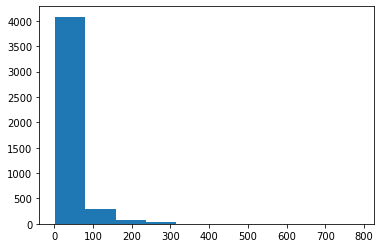

In [ ]:
degrees = [Gsub.degree(n) for n in Gsub.nodes()]
plt.hist(degrees,)
plt.show()

In [ ]:
proteins = list(sorted(Gsub.degree, key=lambda x: x[1], reverse=1))

In [ ]:
#top 5 protein that interacts most are
print("Protein   : Node   : Degree")
print("Protein 1 : " + str(proteins[0][0])+ "   : "+ str(proteins[0][1]))
print("Protein 2 : " + str(proteins[1][0])+ "    : "+ str(proteins[1][1]))
print("Protein 3 : " + str(proteins[2][0])+ "   : "+ str(proteins[2][1]))
print("Protein 4 : " + str(proteins[3][0])+ "   : "+ str(proteins[3][1]))
print("Protein 5 : " + str(proteins[4][0])+ "   : "+ str(proteins[4][1]))

Protein   : Node   : Degree
Protein 1 : 4914   : 787
Protein 2 : 351    : 682
Protein 3 : 1994   : 623
Protein 4 : 7157   : 530
Protein 5 : 2885   : 493


# Page rank

In [ ]:

pr=nx.pagerank(G,alpha=0.85)


In [ ]:
#sorting page rank
sorted_pr = sorted(pr.items(), key = lambda item: item[1], reverse=True)

In [ ]:
#top 10 nodes
top_ten_nodes = []

for node in range(10):
  top_ten_nodes.append(sorted_pr[node][0])

top_ten_nodes


[351, 7157, 9641, 7189, 6714, 983, 3065, 8517, 6667, 7532]

DiGraph with 10 nodes and 27 edges


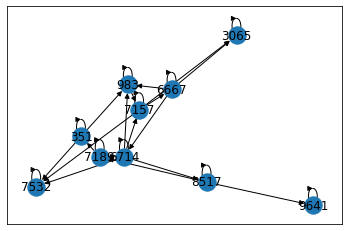

In [ ]:
#create top 10 node subgraph
top_ten_nodes_graph = nx.subgraph(Gsub,top_ten_nodes)
print(nx.info(top_ten_nodes_graph))
nx.draw_networkx(top_ten_nodes_graph)


In [ ]:
#bottom 10 nodes
bottom_ten_nodes = list()
for nod in range(1,11):
  index = -1*nod
  bottom_ten_nodes.append(sorted_pr[index][0])

In [ ]:
bottom_ten_nodes

[779, 27094, 57057, 5459, 145873, 5075, 23207, 51302, 164656, 246778]

DiGraph with 10 nodes and 27 edges


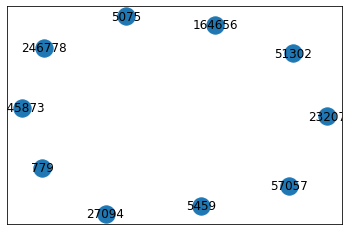

In [ ]:
#create bottom 10 node subgraph
bottom_ten_nodes_graph = nx.subgraph(Gsub,bottom_ten_nodes)
print(nx.info(top_ten_nodes_graph))
nx.draw_networkx(bottom_ten_nodes_graph)

# Betweenness centrality

In [ ]:
bet_cen_top = nx.betweenness_centrality(top_ten_nodes_graph)
bet_cen_bottom = nx.betweenness_centrality(bottom_ten_nodes_graph)

In [ ]:
print("Betweenness centrality for top 10")
print("######################################")
for key, value in bet_cen_top.items():
    print(str(key) + "\t: " + str(value))
print("######################################")


Betweenness centrality for top 10
######################################
8517	: 0.20833333333333331
9641	: 0.0
6667	: 0.20833333333333331
7532	: 0.0
7189	: 0.15277777777777776
7157	: 0.2777777777777778
983	: 0.10416666666666666
3065	: 0.0
6714	: 0.3680555555555555
351	: 0.027777777777777776
######################################


Node 6714 has highest betweennes centrality.
Node 9641, 7532, 3065 have betweennes centrality as 0 i.e. no shortest path pass through them.

In [ ]:
print("\n")
print("Betweenness centrality for bottom 10")
print("######################################")
for key, value in bet_cen_bottom.items():
    print(str(key) + "\t: " + str(value))
print("######################################")



Betweenness centrality for bottom 10
######################################
57057	: 0.0
51302	: 0.0
23207	: 0.0
779	: 0.0
164656	: 0.0
145873	: 0.0
5459	: 0.0
5075	: 0.0
27094	: 0.0
246778	: 0.0
######################################


For above nodes there exist no shortest path passing thorough the vertices.

# Closeness centrality

In [ ]:
clo_cen_top = nx.closeness_centrality(top_ten_nodes_graph)
clo_cen_bottom = nx.closeness_centrality(bottom_ten_nodes_graph)

In [ ]:
print("Closeness centrality for top 10")
print("######################################")
for key, value in clo_cen_top.items():
    print(str(key) + "\t: " + str(value))
print("######################################")


Closeness centrality for top 10
######################################
8517	: 0.23529411764705882
9641	: 0.22685185185185186
6667	: 0.26666666666666666
7532	: 0.4537037037037037
7189	: 0.19047619047619047
7157	: 0.3636363636363636
983	: 0.39999999999999997
3065	: 0.3402777777777778
6714	: 0.3076923076923077
351	: 0.19047619047619047
######################################


Node 7532 has highest closeness centrality and nodes 351 & 7189 have lowest closeness centrality

In [ ]:
print("\n")
print("Closeness centrality for bottom 10")
print("######################################")
for key, value in clo_cen_bottom.items():
    print(str(key) + "\t: " + str(value))
print("######################################")



Closeness centrality for bottom 10
######################################
57057	: 0.0
51302	: 0.0
23207	: 0.0
779	: 0.0
164656	: 0.0
145873	: 0.0
5459	: 0.0
5075	: 0.0
27094	: 0.0
246778	: 0.0
######################################


Closeness centrality is zero for all nodes. There exist no short path between them.

# Eigen vector centrality

In [ ]:
eig_cen_top = nx.eigenvector_centrality(top_ten_nodes_graph)
eig_cen_bottom = nx.eigenvector_centrality(bottom_ten_nodes_graph)

In [ ]:
print("Eigenvector centrality for top 10")
print("######################################")
for key, value in eig_cen_top.items():
    print(str(key) + "\t: " + str(value))
print("######################################")


Eigenvector centrality for top 10
######################################
8517	: 0.16709840766329873
9641	: 0.10945436409466727
6667	: 0.2799914417098063
7532	: 0.4940478855746243
7189	: 0.10945436409466727
7157	: 0.4274471065300698
983	: 0.39746168583261005
3065	: 0.4633966818363057
6714	: 0.25509943684758024
351	: 0.07169419672108081
######################################


Node 7532 has highest Eigenvector centrality and nodes 351 has lowest closeness centrality

In [ ]:

print("Eigenvector centrality for bottom 10")
print("######################################")
for key, value in eig_cen_bottom.items():
    print(str(key) + "\t: " + str(value))
print("######################################")

Eigenvector centrality for bottom 10
######################################
57057	: 0.31622776601683794
51302	: 0.31622776601683794
23207	: 0.31622776601683794
779	: 0.31622776601683794
164656	: 0.31622776601683794
145873	: 0.31622776601683794
5459	: 0.31622776601683794
5075	: 0.31622776601683794
27094	: 0.31622776601683794
246778	: 0.31622776601683794
######################################


All nodes have same Eigenvector centrality.